# Problem Statement

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:

sepalLength: sepal length in cm
sepalWidth: sepal width in cm
petalLength: petal length in cm
petalWidth: petal width in cm
There are 3 classes represneting class label of iris flower {1,2,3}

Iris Setosa
Iris Versicolour
Iris Virginica


# Step 1: Import Required Libraries

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns

In [2]:
Iris_df = pd.read_csv('Iris.csv')

In [3]:
Iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Step 2: Explore the Data Set

In [4]:
Iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris_df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


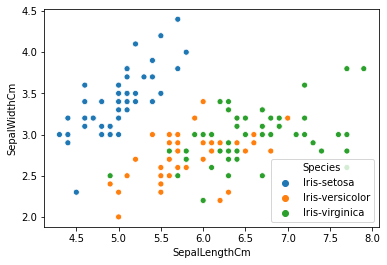

In [7]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm',hue = 'Species', data = Iris_df)

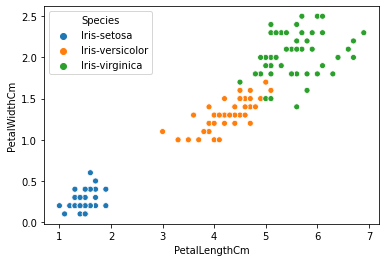

In [8]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm',hue = 'Species', data = Iris_df)

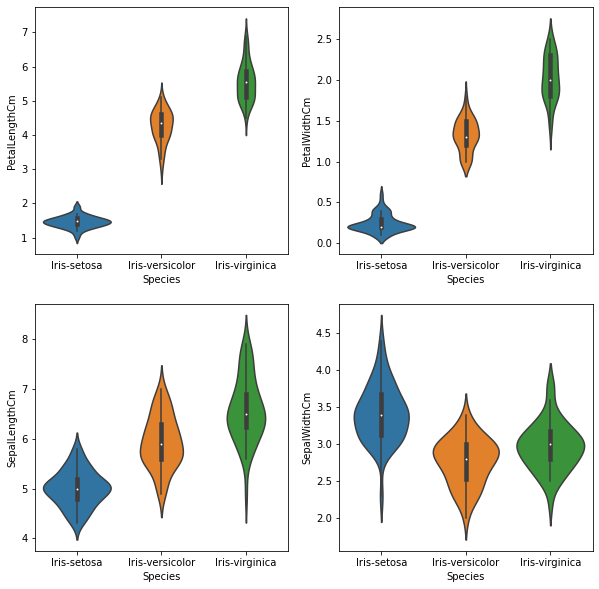

In [14]:
plt.figure(figsize = (10,10))

plt.subplot(2, 2, 1) # 2 rows, 2 columns and 1 element
sns.violinplot(x = 'Species',y = 'PetalLengthCm',data = Iris_df)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'Species',y = 'PetalWidthCm',data = Iris_df)

plt.subplot(2, 2, 3) 
sns.violinplot(x = 'Species',y = 'SepalLengthCm',data = Iris_df)

plt.subplot(2, 2, 4) 
sns.violinplot(x = 'Species',y = 'SepalWidthCm',data = Iris_df)

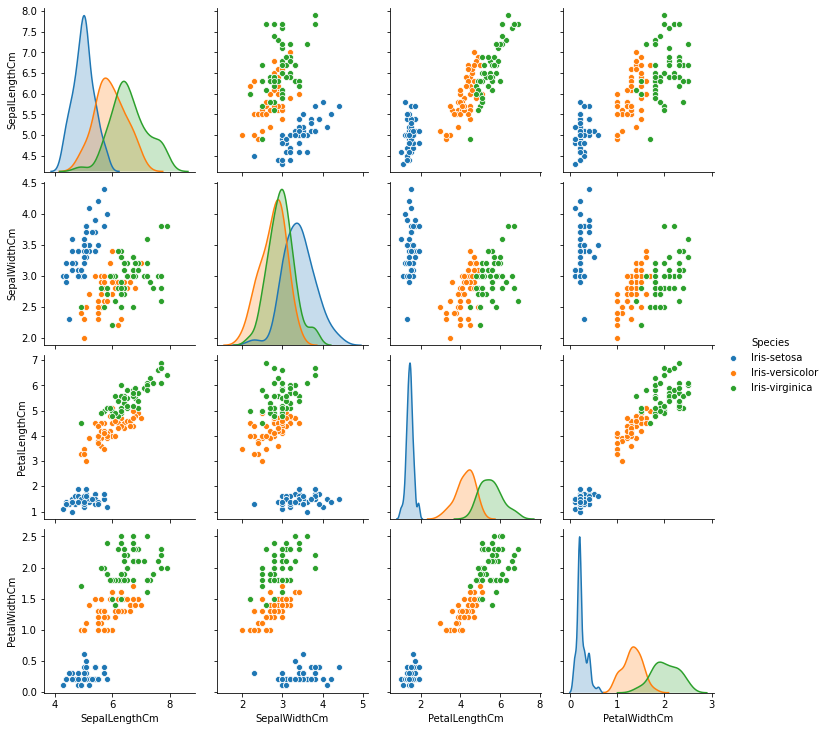

In [17]:
sns.pairplot(Iris_df, hue = 'Species')

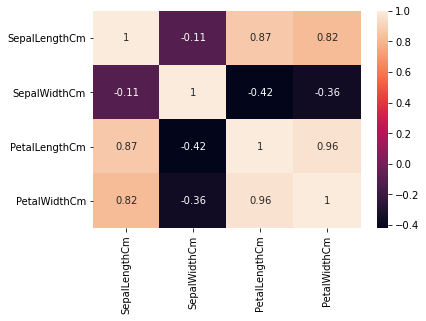

In [20]:
sns.heatmap(Iris_df.corr(), annot = True) # if correlation is 1, that means correlated, and if it is 0, there is no correlation. If negative, there is a inverse correlation. If one variable increases, the other decreases...

# Step 3: Cleaning Up the Data

In [21]:
X = Iris_df.drop(['Species'], axis = 1) # takes all data I have except species

In [23]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y = Iris_df['Species'] # takes species column

In [27]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [37]:
from sklearn.model_selection import train_test_split # Shuffles the data up so I can have accurate learning
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [38]:
x_train.shape #training 97 elements

(112, 4)

In [39]:
x_test.shape # testing 53

(38, 4)

# Step 4: Train the Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2) # this is doing the euclidian distance
classifier.fit(x_train,y_train) # train the model with the train elements x and y

KNeighborsClassifier()

# Step 5: Evaluate the Model

In [43]:
y_predict = classifier.predict(x_test)

In [44]:
y_predict 

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [45]:
y_test

42         Iris-setosa
103     Iris-virginica
143     Iris-virginica
108     Iris-virginica
51     Iris-versicolor
57     Iris-versicolor
41         Iris-setosa
13         Iris-setosa
118     Iris-virginica
14         Iris-setosa
71     Iris-versicolor
138     Iris-virginica
80     Iris-versicolor
148     Iris-virginica
92     Iris-versicolor
20         Iris-setosa
127     Iris-virginica
126     Iris-virginica
122     Iris-virginica
29         Iris-setosa
58     Iris-versicolor
123     Iris-virginica
38         Iris-setosa
107     Iris-virginica
11         Iris-setosa
8          Iris-setosa
33         Iris-setosa
96     Iris-versicolor
46         Iris-setosa
78     Iris-versicolor
21         Iris-setosa
68     Iris-versicolor
12         Iris-setosa
60     Iris-versicolor
90     Iris-versicolor
124     Iris-virginica
17         Iris-setosa
136     Iris-virginica
Name: Species, dtype: object

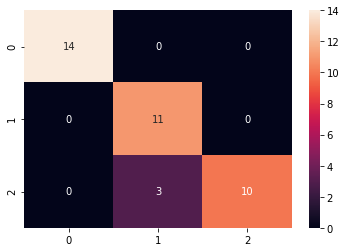

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True) # y axis is prediction, and y_test is the x axis. 

In [51]:
print(classification_report(y_test,y_predict)) # 94% accurate

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.92        38
      macro avg       0.93      0.92      0.92        38
   weighted avg       0.94      0.92      0.92        38

